# ЦПТ своими руками

или задача с 4 недели

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

## Интересное распределение

Я выбрала распределение wrapcauchy(c). Эта величина принимает значения от 0 до $2\pi$, а его плотность вероятности описывается формулой:
$$P(x,c)=\frac{1-c^{2}}{2\pi(1+c^{2}-2c\cos(x))}$$

Наиболее интересным показался график для `c=0.33`.

Матожидание и дисперсию данной величины я вычислила, воспользовавшись функцией `stats`.

Матожидание попало в переменную **mean**, дисперсия - в **var**.

Этими переменными я буду пользоваться при построении нормальных распределений для проверки ЦПТ

In [2]:
# генерируем первую выборку в 1000 элементов. На печать я ее не выводила
# экспериментируя с параметром c, остановилась на 0.33 - так картинка поинтереснее

c = 0.33
rv = sts.wrapcauchy(c)
x0 = rv.rvs(1000)

# вычисляем необходимые статистики - матожидание и дисперсию.

mean, var, skew, kurt = sts.wrapcauchy.stats(c, moments='mvsk')

Строим гистограмму выборки. Я экспериментировала с числом столбцов и остановилась на 30.

**ВАЖНО**: я пишу на `Python 3` и постоянно получаю warning по поводу normed. В Python2 такого быть не должно.

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


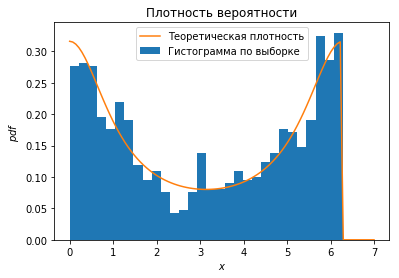

In [3]:
plt.hist(x0, bins=30, label = 'Гистограмма по выборке', normed = True)

x = np.linspace(0,7,100)
pdf = rv.pdf(x)

plt.plot(x, pdf, label = 'Теоретическая плотность')
plt.legend()
plt.ylabel('$pdf$')
plt.xlabel('$x$')
plt.title("Плотность вероятности")
plt.show()

## Проверка ЦПТ

Следующие три ячейки различаются ТОЛЬКО значением n.

---
n - длина выборки, от которой считать среднее

vect - хранит выборки (мало ли, проверяющий не поверит автору)

averages - вектор со средними значениями по каждой выборке

---
Для построения нормального распределения я пользовалась параметрами `mean` и `var` исходного распределения, посчитанными выше.

Поскольку sts.norm(mu, sigma) хочет не дисперсию, а корень из нее, я подавала ему на вход значение:

$$\sigma = \sqrt{\frac{var}{n}}$$

D:\Sveta_ML\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


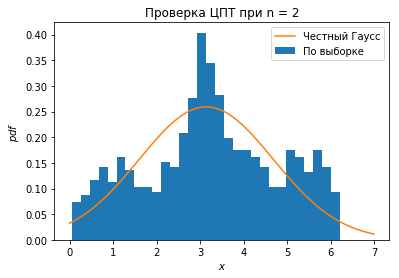

In [210]:
# генерим выборки. n = 2 - единственный случай, при котором гистограмма все еще не похожа на "шляпу"

n = 2
vect = []
for i in range(1000):
    vect.append(rv.rvs(n))

# считаем средние

averages = []
for i in range(1000):
    averages.append(sum(vect[i])/n)

# создаем нормальное распределение. Помним, что var = sigma ** 2

x = np.linspace(0,7,100)
norm = sts.norm(mean, (var/n)**0.5)
pdf = norm.pdf(x)

# рисуем гистограмму и "шляпу Гаусса".

plt.hist(averages, label = 'По выборке', bins=30, normed = True)
plt.plot(x, pdf, label = 'Честный Гаусс')
plt.legend()
plt.ylabel('$pdf$')
plt.xlabel('$x$')
title = 'Проверка ЦПТ при n = '+str(n)
plt.title(title)
plt.show()

D:\Sveta_ML\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


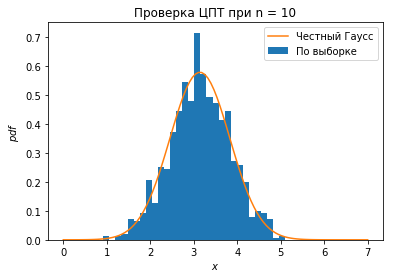

In [207]:
# генерим выборки. n = 10 - хороший "средний" вариант

n = 10
vect = []
for i in range(1000):
    vect.append(rv.rvs(n))

# считаем средние

averages = []
for i in range(1000):
    averages.append(sum(vect[i])/n)

# создаем нормальное распределение. Помним, что var = sigma ** 2

x = np.linspace(0,7,100)
norm = sts.norm(mean, (var/n)**0.5)
pdf = norm.pdf(x)

# рисуем гистограмму и "шляпу Гаусса"

plt.hist(averages, label = 'По выборке', bins=30, normed = True)
plt.plot(x, pdf, label = 'Честный Гаусс')
plt.legend()
plt.ylabel('$pdf$')
plt.xlabel('$x$')
title = 'Проверка ЦПТ при n = '+str(n)
plt.title(title)
plt.show()

D:\Sveta_ML\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


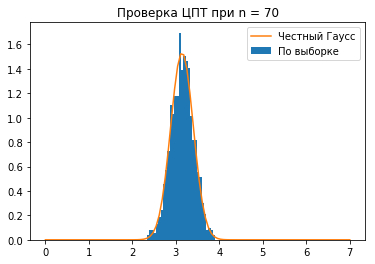

In [214]:
# генерим выборки. n = 70 - достаточно высокая и худая "шляпа"

n = 70
vect = []
for i in range(1000):
    vect.append(rv.rvs(n))

# считаем средние

averages = []
for i in range(1000):
    averages.append(sum(vect[i])/n)

# создаем нормальное распределение. Помним, что var = sigma ** 2

x = np.linspace(0,7,100)
norm = sts.norm(mean, (var/n)**0.5)
pdf = norm.pdf(x)

# рисуем гистограмму и "шляпу Гаусса"

plt.hist(averages, label = 'По выборке', bins=30, normed = True)
plt.plot(x, pdf, label = 'Честный Гаусс')
plt.legend()
title = 'Проверка ЦПТ при n = '+str(n)
plt.title(title)
plt.show()

## Вывод

Гистограммы выборочных средних для разных `n` различаются внешне.

Для достаточно больших `n` гистограмма похожа на оную для нормального распределения.
Т.е. среднее арифметическое значение для достаточно большой выборки близко по своему распределению к нормальному с тем же мат.ожиданием.

Чем больше `n`, тем выше и уже гистограмма, т.е. значения выборочного среднего плотнее расположены около ее мат. ожидания.
Значит чем больше выборка из некоторого распределения, тем точнее оценка его мат. ожидания средним значением данной выборки.